# Tracking Sentiment Across Time and Space

* Space
* Time

### Space

In Python, if you want to do something involving (real world) maps, you'll probably want to use geopandas. However, getting geopandas working can be a challenge, using just pip (or conda) doesn't always work. See this [blog post](https://geoffboeing.com/2014/09/using-geopandas-windows/). Installing its dependencies manually worked for me!

In [1]:
#provided code
#pip install geopandas
import geopandas as gpd

Most of the time you'll want to use some existing map rather than build your own. The good news is there are lots of good maps out there for various countries (and the world), divided up into various administrative zones. There are a few popular formats. One is known as a "shape", and it's probably the most common (it's been around for decades). But we are going to use a more convenient format called the "geoJSON", which, as it name suggests, is a JSON file. I like geoJSON because its readable and all the information is contained in a single file. Also, one of the packages we are going to look at only accepts geoJSON

I've included with this notebook a geoJSON of Canada divided up into provinces called `canada_geo.json`. Let's take a look at it! 

Shape files and GeoJSON contain the same information and it is possible to go back and forth between the two formats. Let's load in the Canadian geoJSON with `read_file`

In [2]:
gdf_canada = gpd.read_file("canada_geo.json")

We can write it to a shape file with `to_file`

In [3]:
gdf_canada.to_file("canada_geo.shp")

We can also write it back to a geoJSON file or to another format called Geopackage. They're all compatible.

Let's take a look at the format of the internal map file

In [4]:
gdf_canada        

name  cartodb_id                 created_at  \
0                      Quebec           1  2014-10-16T13:22:00+00:00   
1   Newfoundland and Labrador           5  2014-10-16T13:22:00+00:00   
2            British Columbia           6  2014-10-16T13:22:00+00:00   
3                     Nunavut          12  2014-10-16T13:22:00+00:00   
4       Northwest Territories          13  2014-10-16T13:22:00+00:00   
5               New Brunswick           7  2014-10-16T13:22:00+00:00   
6                 Nova Scotia           2  2014-10-16T13:22:00+00:00   
7                Saskatchewan           3  2014-10-16T13:22:00+00:00   
8                     Alberta           4  2014-10-16T13:22:00+00:00   
9        Prince Edward Island           8  2014-10-16T13:22:00+00:00   
10            Yukon Territory           9  2014-10-16T13:22:00+00:00   
11                   Manitoba          10  2014-10-16T13:22:00+00:00   
12                    Ontario          11  2014-10-16T13:22:00+00:00   

                   updated_at  \
0   2014-10-16T13:22:00+00:00   
1   2014-10-16T13:22:00+00:00   
2   2014-10-16T13:22:00+00:00   
3   2014-10-16T13:22:00+00:00   
4   2014-10-16T13:22:00+00:00   
5   2014-10-16T13:22:00+00:00   
6   2014-10-16T13:22:00+00:00   
7   2014-10-16T13:22:00+00:00   
8   2014-10-16T13:22:00+00:00   
9   2014-10-16T13:22:00+00:00   
10  2014-10-16T13:22:00+00:00   
11  2014-10-16T13:22:00+00:00   
12  2014-10-16T13:22:00+00:00   

                                             geometry  
0   MULTIPOLYGON (((-78.01917 62.59193, -77.86722 ...  
1   MULTIPOLYGON (((-55.88306 53.48638, -55.72944 ...  
2   MULTIPOLYGON (((-131.07710 52.15009, -130.9481...  
3   MULTIPOLYGON (((-109.97841 78.67106, -109.4053...  
4   MULTIPOLYGON (((-110.39440 78.75221, -109.9784...  
5   MULTIPOLYGON (((-64.48277 47.91777, -64.51472 ...  
6   MULTIPOLYGON (((-60.91028 45.54610, -61.00028 ...  
7   MULTIPOLYGON (((-102.00170 59.99992, -102.0009...  
8   MULTIPOLYGON (((-114.06030 49.00000, -114.0353...  
9   MULTIPOLYGON (((-63.98917 46.39361, -64.13501 ...  
10  MULTIPOLYGON (((-139.12109 69.52916, -139.2522...  
11  MULTIPOLYGON (((-102.00170 59.99992, -100.0390...  
12  MULTIPOLYGON (((-79.54710 51.46013, -79.53944 ...

Surprise, surprise, it's a Pandas dataframe. Note that the columns can vary across formats except the "geometry" column is standard. Let's iterate over the names

In [5]:
for i in range(len(gdf_canada)):
    print(gdf_canada["name"][i])

Quebec
Newfoundland and Labrador
British Columbia
Nunavut
Northwest Territories
New Brunswick
Nova Scotia
Saskatchewan
Alberta
Prince Edward Island
Yukon Territory
Manitoba
Ontario


Now, let's take a look at the geometries:

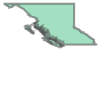

In [9]:
gdf_canada["geometry"][2]  # British Columbia

In [10]:
type(gdf_canada["geometry"][0])

shapely.geometry.multipolygon.MultiPolygon

A MultiPolygon is just a shape with any number of sides. Let's take a look at its methods and attributes

In [8]:
dir(gdf_canada["geometry"][0])

['__and__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_array_interface_base',
 '_crs',
 '_ctypes',
 '_ctypes_data',
 '_empty',
 '_geom',
 '_get_coords',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 '_set_geom',
 'almost_equals',
 'area',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',


Ah, it has a centroid. Let's take a look at it.

In [11]:
str(gdf_canada["geometry"][2].centroid)

'POINT (-124.73662996308089 54.76791885283666)'

In [12]:
gdf_canada["geometry"][2].centroid.x

-124.73662996308089

Note that we can create points if we have a longitude and latitude.

In [13]:
from shapely.geometry import Point

print(Point((-71.7,53.3)))

POINT (-71.7 53.3)


For our purposes,the most useful method associated with the multipolygon is probably "contains". If we have a point at some coordinates, we can check to see if it is contained in the polygon. Let's do that with the centroid, showing that it is in its corresponding province but not in any other.

In [14]:
centroid = gdf_canada["geometry"][2].centroid

In [15]:
gdf_canada["geometry"][2].contains(centroid)

True

In [16]:
gdf_canada["geometry"][7].contains(centroid)

False

Let's look at our map by plotting it. Geopandas maps can be plotted with matplotlib, using the `plot` method.

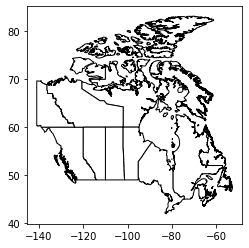

In [17]:
import matplotlib.pyplot as plt

gdf_canada.plot(color='white', edgecolor='black')
plt.show()

Let's place Vancouver on the map by finding its coordinates and adding a point there.

(Wikipedia says 49 degrees 15 minutes 40 seconds North, 123 degrees 6 minutes 50 seconds West)

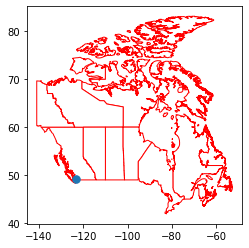

In [27]:
#Vancouver coordinates
latitude = 49.2827
longitude = -123.1207

gdf_canada.plot(color='white', edgecolor='red')
plt.plot(longitude,latitude,".",markersize=15)
plt.show()

One city at a time is kind of boring. With matplotlib we can do this programmatically. Let's put all Canadian cities on the map at once, using the information in the provided ca.json file. We will make bigger dots for bigger cities

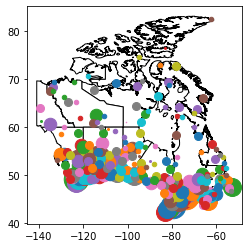

<Figure size 720x720 with 0 Axes>

In [20]:
import json

f = open("ca.json")
cities = json.load(f)
f.close()
gdf_canada.plot(color='white', edgecolor='black')
for city in cities:
    plt.plot(float(city["lng"]), float(city["lat"]), '.', markersize=len(city["population"])**2)
plt.show()

That works fine for individual points, but what if we want to visualize properties which apply to regions rather than individual points? Let's suppose, for instance, we have happiness ratings for particular provinces and want to visualize them. We'll start by randomly creating such ratings 

In [21]:
import random

happiness = {}
for province in gdf_canada["name"]:
    happiness[province] = random.random()

In [22]:
happiness

{'Quebec': 0.07052707578844364,
 'Newfoundland and Labrador': 0.6244340880787596,
 'British Columbia': 0.47578522931808986,
 'Nunavut': 0.047810566773570096,
 'Northwest Territories': 0.2561924440497134,
 'New Brunswick': 0.04980357138355407,
 'Nova Scotia': 0.6942335639106252,
 'Saskatchewan': 0.6967767527485595,
 'Alberta': 0.5618100981005172,
 'Prince Edward Island': 0.8283214580316923,
 'Yukon Territory': 0.016144638763402108,
 'Manitoba': 0.25631243334043385,
 'Ontario': 0.19145143852247726}

> We just randomly generate this happiness index! Don't take them too seriously lol

A map which is divided up into adminstrative regions with each region given a colour based on some variable is called a [choropleth](https://en.wikipedia.org/wiki/Choropleth_map). Here's an example which shows life expectancy of countries around the world.

In [23]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df, locations="iso_alpha",
                    color="lifeExp", 
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

We do this using a package called plotly. Both the map and the underlying data for the above example are included in plotly, but we can do this with new maps and new data. Let's start with the data. The ploty.express.choropleth constructor takes a dataframe as its first object. Let's construct one from our Python dictionary.

In [24]:
import pandas as pd

prov_happy_df = pd.DataFrame(list(happiness.items()),columns=["name","happiness"])

In [25]:
prov_happy_df

name  happiness
0                      Quebec   0.070527
1   Newfoundland and Labrador   0.624434
2            British Columbia   0.475785
3                     Nunavut   0.047811
4       Northwest Territories   0.256192
5               New Brunswick   0.049804
6                 Nova Scotia   0.694234
7                Saskatchewan   0.696777
8                     Alberta   0.561810
9        Prince Edward Island   0.828321
10            Yukon Territory   0.016145
11                   Manitoba   0.256312
12                    Ontario   0.191451

We also need the geoJSON. We will reload it as a regular JSON file 

In [63]:
f = open("canada_geo.json")
ca_geojson = json.load(f)
f.close()

In [64]:
ca_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-78.019173, 62.59193],
       [-77.867218, 62.589161],
       [-77.837784, 62.556938],
       [-78.103333, 62.559158],
       [-78.107773, 62.582771],
       [-78.019173, 62.59193]]],
     [[[-69.182503, 59.128601],
       [-69.198608, 59.067211],
       [-69.132767, 59.055271],
       [-69.221123, 58.991661],
       [-69.223053, 58.95332],
       [-69.290283, 58.977211],
       [-69.35556, 58.949711],
       [-69.278343, 59.066669],
       [-69.357224, 59.139721],
       [-69.275284, 59.154991],
       [-69.182503, 59.128601]]],
     [[[-79.496384, 56.766941],
       [-79.486107, 56.658039],
       [-79.523621, 56.66721],
       [-79.567497, 56.615269],
       [-79.583893, 56.652771],
       [-79.549438, 56.68111],
       [-79.551941, 56.73193],
       [-79.589996, 56.76833],
       [-79.58168, 56.807209],
       [-79.496384, 56.766941]]],
     [[[-78.900284, 

The geoJSON of Canada I got off the web is missing one thing that is required for a plotly choroplath: an id for each of its "features" (provinces). If you don't do this, you will get an empty white plot. We will add those manually.

In [65]:
for province in ca_geojson["features"]:
    province["id"] = province["properties"]["name"]

Note that in order for this to work, the identifiers in the geoJSON and the dataframe must be aligned (i.e. we need a "name" field in both, with corresponding elements).

We are now ready to build the chronopleth. It has the following arguments:

* the dataframe with our happiness information
* the Canada geojson (geojson)
* the column of the dataframe corresponding to location names (locations)
* the column of the dataframe corresponding to the value which will be used for (color)
* (optional) a list of columns which should appear when mouse hovers over, in the order they should appear (hover_data)
* (optional) the colour scheme (color_continuous_scale)
* (optional) a projection of the map to improve the look (projection="mercator")
* and lots more, if you want to fiddle, see the [docs](https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html)

You can use the `fig.update_geos(fitbounds="locations")` command to centre the plot on the relevant parts of the world

In [66]:
fig = px.choropleth(prov_happy_df, geojson=ca_geojson, color="happiness",
                    locations="name", projection="mercator",color_continuous_scale="sunset",hover_data=["happiness","name"]
                   )
fig.update_geos(fitbounds="locations")
fig.show()

### Time

When dealing with time in Python, we will likely want to make use of the [datetime](https://docs.python.org/3/library/datetime.html) library. There are three main classes in datetime: date, time, and datetime. A `date` contains only information about the date, `time` only information about the time of day, and `datetime` contains both date and time, thereby indicating an exact moment in time. Though distinct, they have numerous shared properties.

We can initialize a date by providing the year, month, and day as the arguments of the constructor

In [31]:
import datetime
todays_date = datetime.date(2022,3,15)

In [32]:
todays_date

datetime.date(2022, 3, 15)

Or we can just get today's date directly, with `date.today`

In [33]:
todays_date = datetime.date.today()
todays_date

datetime.date(2022, 3, 21)

Given a date, we can access its attributes as one would expect

In [34]:
todays_date.year

2022

In [35]:
todays_date.day

21

Dates (and datetimes) can be treated like numbers for various purposes. They can be compared and sorted

In [36]:
last_Tuesday = datetime.date(2021,3,8)
last_Tuesday < todays_date

True

And subtracted

In [37]:
diff = todays_date - last_Tuesday

The resulting deltas can be added to get new dates

In [38]:
todays_date + diff

datetime.date(2023, 4, 3)

Time objects are not mutable, which means they can be used as keys in dictionaries, etc.

In [39]:
todays_date.year = 2022

AttributeError: attribute 'year' of 'datetime.date' objects is not writable

Another way to modify (create a new) date from an existing one is to use the `replace` command

In [40]:
todays_date.replace(year=2022,month=9)

datetime.date(2022, 9, 21)

Note that dates know what day of the week they are, use `weekday`

In [41]:
todays_date.weekday()

0

Time works much the same way as date, though it doesn't allow arthmetic

In [42]:
my_time = datetime.time(6,30,1)

In [43]:
my_time.second

1

In [44]:
five_minutes_later = my_time.replace(minute=35)

In [45]:
five_minutes_later

datetime.time(6, 35, 1)

In [46]:
five_minutes_later > my_time

True

You can't subtract two time objects, but you can use the 'timedelta' module:

In [47]:
five_minutes_later - my_time

TypeError: unsupported operand type(s) for -: 'datetime.time' and 'datetime.time'

In [48]:
time1 = datetime.timedelta(hours=my_time.hour, minutes=my_time.minute, seconds=my_time.second)
time2 = datetime.timedelta(hours=five_minutes_later.hour, minutes=five_minutes_later.minute, seconds=five_minutes_later.second)

In [49]:
time2 - time1

datetime.timedelta(seconds=300)

Note that time (and datetime) use a 24 hour clock

In [50]:
datetime.time(24,30,1)

ValueError: hour must be in 0..23

The `datetime` class has all the attributes of both `date` and `time`. There are now a lot of numbers, so we might prefer to use `ctime`, which gives us a nice readable string representation.

In [51]:
moment_in_time = datetime.datetime(2022,3,15,9,30,1)

In [52]:
moment_in_time.ctime()

'Tue Mar 15 09:30:01 2022'

Sometimes you want to read a datetime from a string in a particular format. You could of course manually create the object using string manipulation and the constructor, but there is a better way using [`strptime`](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) where you can indicate the exact format you are expecting. Here are the possible options for formatting datetimes

- %an abbreviated day of week (Sun)
- %A full day of week (Sunday)
- %d day of month as two digits (05)
- %b abbreviated month (Jan)
- %B full month (January)
- %m month as two digits (01)
- %y year as two digits (20)
- %Y year as four digits (2020)
- %H hour for 24 hour clock (23)
- %I hour for 12 hour clock (11)
- %p AM or PM
- %M minutes
- %S seconds
- %z UTC offset (time zone)
- %Z time zone name (EST)

In [53]:
datetime_string1 = "9:30 PM, Mar 15, 2022"
datetime_string2 = "16:30:03, March 15, 22"
format_string1 ="%I:%M %p, %b %d, %Y"
format_string2 ="%H:%M:%S, %B %d, %y"
dt1 = datetime.datetime.strptime(datetime_string1,format_string1)
print(dt1)
dt2 = datetime.datetime.strptime(datetime_string2,format_string2)
print(dt2)

2022-03-15 21:30:00
2022-03-15 16:30:03


You can also use the parser in dateutil to parse different times:

In [54]:
from dateutil import parser

print(parser.parse("Tuesday, March 15th, 2022, 9:30am"))
print(parser.parse("9:30am, Tuesday, March 15"))

2022-03-15 09:30:00
2022-03-15 09:30:00


Note there are two distinct flavors of datetime, depending on whether on whether or not you have provided a time zone. A datetime without a time zone cannot actually be tied to a specific moment in time, since it could refer to different moments in different parts of the world. A timezone can be included in a datetime when it is created (using the above), or added later with the `pytz` package using the `localize` method for a `timezone`.

In [58]:
#!pip install pytz
from pytz import timezone
pacific_time = timezone("Canada/Pacific")
localized_dt = pacific_time.localize(dt1)

In [59]:
localized_dt

datetime.datetime(2022, 3, 15, 21, 30, tzinfo=<DstTzInfo 'Canada/Pacific' PDT-1 day, 17:00:00 DST>)

Once a time has been localized, it now refers to a specific moment in time, and it can be converted into the same moment in a different timezone by using the `astimezone` method

In [60]:
localized_dt.astimezone(timezone('Canada/Eastern'))

datetime.datetime(2022, 3, 16, 0, 30, tzinfo=<DstTzInfo 'Canada/Eastern' EDT-1 day, 20:00:00 DST>)

In general it is prefered to keep times in the UTC timezone (i.e. Greenwich Mean Time) as much as possible, which is how they are stored in the tweets you will be processing in your lab.

Finally, it is easy to create a date and/or time object from the information contained within a datetime

In [61]:
localized_dt.time()

datetime.time(21, 30)

In [62]:
localized_dt.date()

datetime.date(2022, 3, 15)